# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 20.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 8.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 65 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 72.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 6.3 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [2]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp9 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [19]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [21]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5427440,-77.4411961,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [25]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [ ]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 19 17:28:04 +0000 2021'
'Fri Nov 19 17:27:40 +0000 2021'
'Fri Nov 19 17:27:11 +0000 2021'
'Fri Nov 19 17:26:56 +0000 2021'
'Fri Nov 19 17:26:54 +0000 2021'
'Fri Nov 19 17:24:55 +0000 2021'
'Fri Nov 19 17:24:16 +0000 2021'
'Fri Nov 19 17:22:39 +0000 2021'
'Fri Nov 19 17:21:35 +0000 2021'
'Fri Nov 19 17:19:29 +0000 2021'
'Fri Nov 19 17:18:26 +0000 2021'
'Fri Nov 19 17:17:24 +0000 2021'
'Fri Nov 19 17:17:02 +0000 2021'
'Fri Nov 19 17:15:44 +0000 2021'
'Fri Nov 19 17:15:12 +0000 2021'
'Fri Nov 19 17:15:02 +0000 2021'
'Fri Nov 19 17:14:11 +0000 2021'
'Fri Nov 19 17:10:06 +0000 2021'
'Fri Nov 19 17:09:37 +0000 2021'
'Fri Nov 19 17:09:24 +0000 2021'
'Fri Nov 19 17:09:10 +0000 2021'
'Fri Nov 19 17:09:03 +0000 2021'
'Fri Nov 19 17:07:43 +0000 2021'
'Fri Nov 19 17:07:36 +0000 2021'
'Fri Nov 19 17:07:34 +0000 2021'
'Fri Nov 19 17:05:22 +0000 2021'
'Fri Nov 19 17:05:01 +0000 2021'
'Fri Nov 19 17:01:55 +0000 2021'
'Fri Nov 19 17:01:12 +0000 2021'
'Fri Nov 19 17:00:51 +0000 2021'
'Fri Nov 1

'Fri Nov 19 02:33:42 +0000 2021'
'Fri Nov 19 02:31:31 +0000 2021'
'Fri Nov 19 02:00:06 +0000 2021'
'Fri Nov 19 01:52:00 +0000 2021'
'Fri Nov 19 01:49:01 +0000 2021'
'Fri Nov 19 01:35:26 +0000 2021'
'Fri Nov 19 01:33:31 +0000 2021'
'Fri Nov 19 01:20:29 +0000 2021'
'Fri Nov 19 01:16:26 +0000 2021'
'Fri Nov 19 01:13:58 +0000 2021'
'Fri Nov 19 01:11:56 +0000 2021'
'Fri Nov 19 01:09:22 +0000 2021'
'Fri Nov 19 00:54:48 +0000 2021'
'Fri Nov 19 00:51:10 +0000 2021'
'Fri Nov 19 00:30:13 +0000 2021'
'Fri Nov 19 00:08:09 +0000 2021'
'Fri Nov 19 00:03:05 +0000 2021'
'Fri Nov 19 00:00:06 +0000 2021'
'Thu Nov 18 23:59:09 +0000 2021'
'Thu Nov 18 23:51:04 +0000 2021'
'Thu Nov 18 23:44:24 +0000 2021'
'Thu Nov 18 23:40:02 +0000 2021'
'Thu Nov 18 23:40:00 +0000 2021'
'Thu Nov 18 23:36:16 +0000 2021'
'Thu Nov 18 23:35:02 +0000 2021'
'Thu Nov 18 23:34:09 +0000 2021'
'Thu Nov 18 23:28:07 +0000 2021'
'Thu Nov 18 23:23:27 +0000 2021'
'Thu Nov 18 23:21:12 +0000 2021'
'Thu Nov 18 23:20:34 +0000 2021'
'Thu Nov 1

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [5]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3971
1825


Create a text index and print the Tweets containing specific keywords. 

In [6]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [7]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain covid

Use pprint to display tweets

In [8]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Katiedid shedid shedidnt
text: @iahphx I think the Covid19 virus is everywhere.  Are these admissions *from* Covid or *with* Covid?
----
name: Sherry Sherry
text: #COVID19 
#CovidSurge
Covid is now hitting younger people, faster and harder

#Covid https://t.co/xhARI9xDia
----
name: Dr. Rachel Roper
text: Young people are not safe from COVID. More than 960,000 children have been hospitalized with COVID in US, and more… https://t.co/AyrOtzyGWW
----
name: Dr. Rachel Roper
text: Detect COVID in HVAC air systems #covid  #COVID19 #covid_19 #coronavirus #corona   https://t.co/GTTTQDmOb5
----
name: kdawg
text: Decent Covid protocols exclude anyone with a significant headache until they rule out COVID-19 with a negative Covi… https://t.co/KPHgTvDwTG
----
name: WA State Woman
text: Ladies, make sure you get your mammogram BEFORE your COVID booster, or wait several weeks after your COVID booster… https://t.co/MAr0ZQTRQp
----
name: NIHB
text: Interested in hearing from Tribal youth abou

In [9]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [10]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang
0,61980405e18ca87e95dbd920,Mon Nov 15 06:07:19 +0000 2021,1460127252054745090,1460127252054745090,#Venezuelans are voting against #Cuba's experi...,True,"{'hashtags': [{'text': 'Venezuelans', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,None,None,False,1,4,False,False,False,en
1,61980410e18ca87e95dbdb7c,Fri Nov 12 23:11:32 +0000 2021,1459297840379871232,1459297840379871232,#Latvia bans #COVID19 unvaccinated lawmakers f...,False,"{'hashtags': [{'text': 'Latvia', 'indices': [0...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,None,False,0,1,False,False,False,en
2,61980418e18ca87e95dbdd04,Fri Nov 12 05:54:40 +0000 2021,1459036907074109440,1459036907074109440,@LBC @MaajidNawaz Chinese influence goes furth...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.322929e+18,...,None,None,None,False,0,0,False,False,NaN,en
3,619803d7e18ca87e95dbd03a,Fri Nov 19 15:56:30 +0000 2021,1461725078656196610,1461725078656196610,@dougducey has totally FAILED Arizonans with 2...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,None,None,False,0,0,False,False,NaN,en
4,619803d6e18ca87e95dbcff4,Fri Nov 19 17:21:35 +0000 2021,1461746488137199618,1461746488137199618,CDC ACIP meeting begins. Vote at 245pm ET.\n\n...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,None,None,False,13,125,False,False,False,en


<AxesSubplot:>

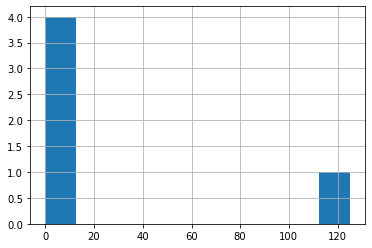

In [11]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count